In [1]:
import pandas as pd 
dt= pd.read_csv('ibadan_malaria-prevalence_dataset_1996-2017.csv')

In [2]:
dt1=dt.drop(['year','month','nchildren','m-age-neg','m-age-pos','iqr-age-neg','iqr-age-pos','x-pd','sd-pd','mmP-rf','min-temp','max-temp'],axis=1)
dt1.head()

,mm-rf,x-temp,preP
0,2.1,27.745161,0.451613
1,20.9,28.694828,0.465753
2,76.0,28.367903,0.149606
3,140.9,27.763333,0.136126
4,115.1,27.059677,0.309237


In [3]:
import numpy as np 
dt1=np.array(dt1)
dt1[0]
X=dt1

In [4]:
# LEAST SQUARES 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
#X = np.loadtxt('LorenzData.csv', delimiter=',')

dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.1

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(100):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    dim = 2  # For two-dimensional problems
    #dim = 3  # For three-dimensional problems
    #dim=1
    #idx=2
    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]



In [6]:
small_indices = np.abs(Xi) < lambda_val
small_indices

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False,  True,  True],
       [False, False, False],
       [False, False, False]])

In [9]:
Xi
Xi.shape

(10, 3)

In [8]:
malinc=Xi[:10,2]
malinc

array([ 7.21978929e+01, -2.57089333e+00, -1.43985308e+01,  2.08555144e+03,
        1.12817751e-01, -8.45519873e+01, -1.02614849e-01,  0.00000000e+00,
        4.64147575e-01, -9.32594401e+01])

In [141]:
def mal(r,t,m): return malinc[0] + malinc[1]*r+malinc[2]*t+malinc[3]*m+malinc[4]*r*t+malinc[5]*t*m+malinc[6]*r*m+malinc[7]*r*r+malinc[8]*t*t+malinc[9]*m*m

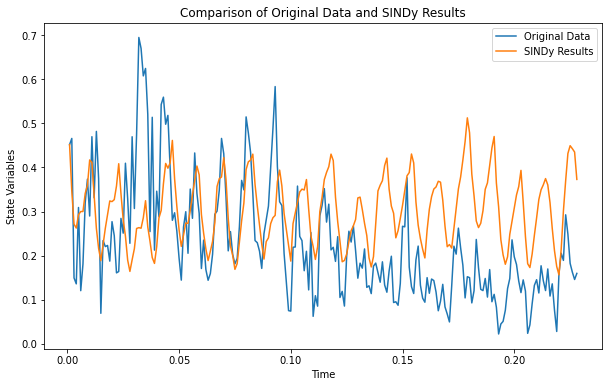

In [145]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(228)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:228], X[:,2], label='Original Data')
plt.plot(t[:228], X_sindy[:], label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()


In [45]:
mal(2.1,27.7451,0.451613)

-101.36136825165292

In [275]:
# MULTIPLE LAMBDA VALUES 

In [269]:
X=dt1

In [271]:
out1=[]
# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
#x4, y4, z4 = x3 * x, y3 * y, z3 * z
#x5, y5, z5 = x4 * x, y4 * y, z4 * z
#cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
#sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xii = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]


for i in range(1,10):
    
    Xi=Xii
    dt = 0.001
    tmax = 50
    t = np.arange(dt, tmax + dt, dt)

    # Main Parameters
    lambda_val = i/10


    for k in range(10):
        small_indices = np.abs(Xi) < lambda_val
        Xi[small_indices] = 0

        #dim = 2  # For two-dimensional problems
        dim = 3  # For three-dimensional problems
        #dim=1
        #idx=2
        for idx in range(dim):
            big_indices = ~small_indices[:, idx]
            Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]

    malinc=Xi[:,2]

    x0, y0, z0 = X[0,:]
    X_sindy = np.zeros(228)
    #X_sindy[0, :] = [x0, y0, z0]
    X_sindy[0] = z0
    for idx in range(1, X.shape[0]):
        x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
        z = X_sindy[idx - 1]
        #dxdt_sindy = 10 * (y - x)
        #dydt_sindy = x * (28 - z) - y
        dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

        #dXdt_sindy = np.array(dzdt_sindy)

        X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy
    out1.append(X_sindy)

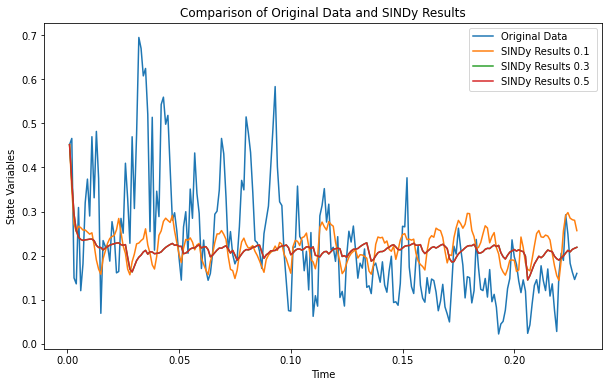

In [273]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:228], X[:,2], label='Original Data')
plt.plot(t[:228], out1[0], label='SINDy Results 0.1')
#plt.plot(t[:228], out1[1], label='SINDy Results 0.2')
plt.plot(t[:228], out1[2], label='SINDy Results 0.3 ')
#plt.plot(t[:228], out1[3], label='SINDy Results 0.4 ')
plt.plot(t[:228], out1[4], label='SINDy Results 0.5')
#plt.plot(t[:228], out1[5], label='SINDy Results 0.6')
#plt.plot(t[:228], out1[6], label='SINDy Results 0.7 ')
#plt.plot(t[:228], out1[7], label='SINDy Results 0.8 ')
#plt.plot(t[:228], out1[8], label='SINDy Results 0.9 ')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [18]:
X_sindy[1]

0.3502496982141633

In [19]:
from sklearn.metrics import mean_absolute_percentage_error as mape 
from sklearn.metrics import mean_squared_log_error as rmsle
mape(X[:5,2],X_sindy[:5])

0.4145464311911291

In [20]:
rmsle(X[:,2],X_sindy)

0.009431653513533722

In [276]:
# LAMBDA =0.1

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
#X = np.loadtxt('LorenzData.csv', delimiter=',')

dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.1

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(1000):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    #dim = 2  # For two-dimensional problems
    dim = 3  # For three-dimensional problems

    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]



In [138]:
mape(X[:5,2],X_sindy[:5])

0.4145464311911291

In [139]:
rmsle(X[:,2],X_sindy)

0.009431653513533722

In [7]:
Xi

array([[ 3.96118830e+06, -1.42922151e+04,  9.26380992e+02],
       [-2.55647374e+03,  3.43804564e+01, -4.10840873e+00],
       [-2.99255904e+05,  1.56629255e+03, -7.31276127e+01],
       [ 2.03108498e+06, -1.70489302e+04,  2.17095473e+03],
       [ 1.04952603e+02, -1.56514432e+00,  1.63288749e-01],
       [-7.17038135e+04,  5.30504973e+02, -8.73489262e+01],
       [-6.05930695e+02,  8.11348328e+00, -2.21840716e-01],
       [-1.79599591e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.64710522e+03, -3.70705572e+01,  1.47287822e+00],
       [-6.44575098e+04,  3.51529043e+03, -9.43264263e+01]])

In [8]:
malinc=Xi[:10,2]
malinc

array([ 9.26380992e+02, -4.10840873e+00, -7.31276127e+01,  2.17095473e+03,
        1.63288749e-01, -8.73489262e+01, -2.21840716e-01,  0.00000000e+00,
        1.47287822e+00, -9.43264263e+01])

In [9]:
def mal1(r,t,m): return malinc[0] + malinc[1]*r+malinc[2]*t+malinc[3]*m+malinc[4]*r*t+malinc[5]*t*m+malinc[6]*r*m+malinc[7]*r*r+malinc[8]*t*t+malinc[9]*m*m

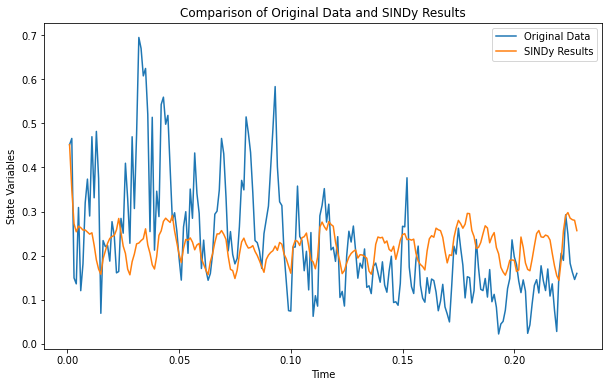

In [10]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(228)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal1(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:228], X[:,2], label='Original Data')
plt.plot(t[:228], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()


In [277]:
# INCLUDING CUBIC TERMS IN THETA 

In [156]:
dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.1

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2,x3,y3,z3])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(1000):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    #dim = 2  # For two-dimensional problems
    dim = 3  # For three-dimensional problems

    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]

In [157]:
Xi

array([[ 4.83845500e+07, -1.47794424e+04,  2.03245118e+04],
       [-2.90395832e+03,  3.52903991e+01,  2.71243468e-01],
       [-5.18282090e+06,  1.58158983e+03, -2.33808817e+03],
       [ 2.22011285e+06, -1.46678389e+04,  3.45923277e+03],
       [ 1.17293057e+02, -1.60095693e+00,  0.00000000e+00],
       [-7.19670682e+04,  5.07868556e+02, -1.10099062e+02],
       [-5.55686663e+02,  8.27508832e+00, -4.92317829e-01],
       [-1.63626067e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.83986762e+05, -3.71452426e+01,  8.82191147e+01],
       [-6.28248062e+05, -2.92492874e+03, -2.40000694e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.16430999e+03,  0.00000000e+00, -1.09408177e+00],
       [ 5.04257675e+05,  6.44967003e+03,  2.28304342e+03]])

In [158]:
malinc=Xi[:,2]
malinc

array([ 2.03245118e+04,  2.71243468e-01, -2.33808817e+03,  3.45923277e+03,
        0.00000000e+00, -1.10099062e+02, -4.92317829e-01,  0.00000000e+00,
        8.82191147e+01, -2.40000694e+03,  0.00000000e+00, -1.09408177e+00,
        2.28304342e+03])

In [159]:
def mal2(r,t,m): return malinc[0] + malinc[1]*r+malinc[2]*t+malinc[3]*m+malinc[4]*r*t+malinc[5]*t*m+malinc[6]*r*m+malinc[7]*r*r+malinc[8]*t*t+malinc[9]*m*m+malinc[10]*r*r*r+malinc[11]*t*t*t+malinc[12]*m*m*m

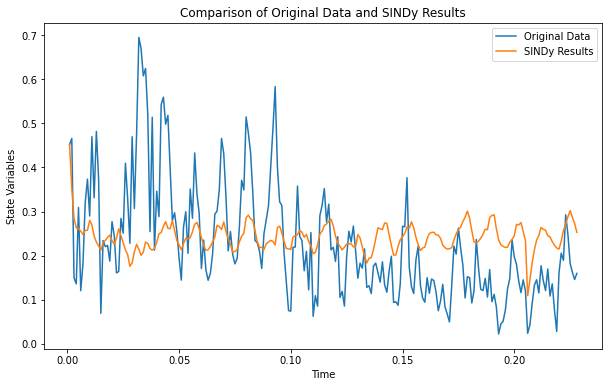

In [160]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(228)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal2(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:228], X[:,2], label='Original Data')
plt.plot(t[:228], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [161]:
# TRAIN ON LESS DATA 

In [233]:
X=dt1[:50]

In [234]:
dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.1

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(10):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    #dim = 2  # For two-dimensional problems
    dim = 3  # For three-dimensional problems
    #dim=1
    #idx=2
    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]


In [235]:
Xi

array([[-1.06046794e+06, -2.25879992e+04,  9.20642891e+03],
       [ 1.05942794e+04,  4.67111056e+01, -1.08920891e+01],
       [ 3.51027126e+04,  1.67947444e+03, -6.65069958e+02],
       [ 2.07387491e+06,  1.69519407e+04,  2.74972621e+03],
       [-3.56083138e+02, -1.86944831e+00,  3.89042230e-01],
       [-7.17610012e+04, -4.14188446e+02, -1.32749384e+02],
       [ 1.08190415e+02,  2.04832631e+00,  1.58873990e+00],
       [-6.54952205e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.21092152e+02, -3.23150774e+01,  1.23076039e+01],
       [-1.76437690e+05, -6.46521704e+03,  3.10471959e+02]])

In [236]:
malinc=Xi[:,2]
malinc

array([ 9.20642891e+03, -1.08920891e+01, -6.65069958e+02,  2.74972621e+03,
        3.89042230e-01, -1.32749384e+02,  1.58873990e+00,  0.00000000e+00,
        1.23076039e+01,  3.10471959e+02])

In [237]:
def mal2(r,t,m): return malinc[0] + malinc[1]*r+malinc[2]*t+malinc[3]*m+malinc[4]*r*t+malinc[5]*t*m+malinc[6]*r*m+malinc[7]*r*r+malinc[8]*t*t+malinc[9]*m*m

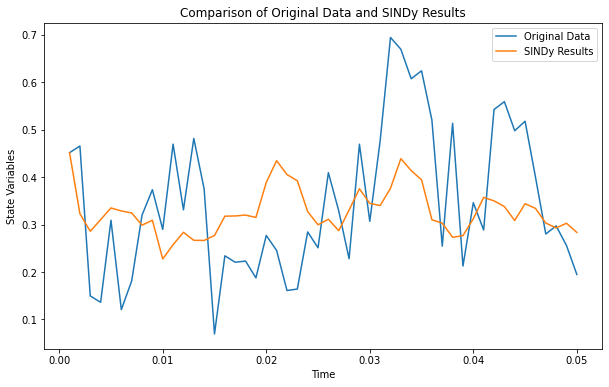

In [238]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(50)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal2(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:50], X[:,2], label='Original Data')
plt.plot(t[:50], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [246]:
#on test data, pareto plot, SR3 

In [240]:
tst=pd.read_csv('ibadan-val.csv')
tst1=tst.drop(['year','month','nchildren','m-age-neg','m-age-pos','iqr-age-neg','iqr-age-pos','x-pd','sd-pd','mmP-rf','min-temp','max-temp'],axis=1)
tst1=np.array(tst1)

In [241]:
tst1.shape

(36, 3)

In [250]:
X=tst1

In [278]:
# with existing mal function 

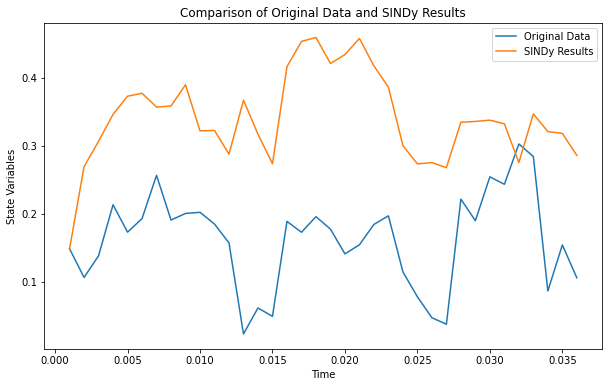

In [245]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(36)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:36], X[:,2], label='Original Data')
plt.plot(t[:36], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [279]:
# Training on test data 

In [251]:
dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.1

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(10):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    #dim = 2  # For two-dimensional problems
    dim = 3  # For three-dimensional problems
    #dim=1
    #idx=2
    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]


In [252]:
Xi

array([[ 2.33671809e+07,  5.53794335e+04,  2.29682482e+03],
       [-1.43371017e+04,  2.85960915e+01,  9.95847250e-01],
       [-1.66174170e+06, -2.82875560e+03, -1.84475348e+02],
       [-1.62046563e+06, -1.12286271e+05,  9.38314561e+02],
       [ 4.96518551e+02, -1.19687249e+00,  0.00000000e+00],
       [ 7.36892600e+04,  3.17604380e+03, -5.60576704e+01],
       [ 5.10031454e+03,  3.30390118e+00, -3.54996138e+00],
       [-9.48807175e-01,  0.00000000e+00,  0.00000000e+00],
       [ 2.95226431e+04,  3.29912858e+01,  3.70028068e+00],
       [-2.82251555e+06,  5.77607606e+04,  9.26675750e+02]])

In [254]:
malinc=Xi[:,2]

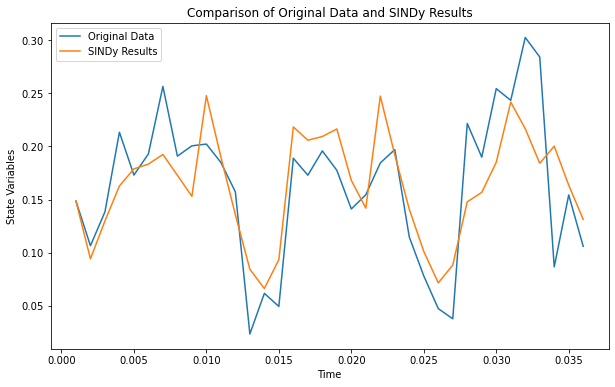

In [255]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(36)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:36], X[:,2], label='Original Data')
plt.plot(t[:36], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [280]:
# MULTIPLE LAMBDA VALUES 

In [267]:
out1=[]
# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
#x4, y4, z4 = x3 * x, y3 * y, z3 * z
#x5, y5, z5 = x4 * x, y4 * y, z4 * z
#cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
#sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xii = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]


for i in range(1,10):
    
    Xi=Xii
    dt = 0.001
    tmax = 50
    t = np.arange(dt, tmax + dt, dt)

    # Main Parameters
    lambda_val = i/10


    for k in range(10):
        small_indices = np.abs(Xi) < lambda_val
        Xi[small_indices] = 0

        #dim = 2  # For two-dimensional problems
        dim = 3  # For three-dimensional problems
        #dim=1
        #idx=2
        for idx in range(dim):
            big_indices = ~small_indices[:, idx]
            Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]

    malinc=Xi[:,2]

    x0, y0, z0 = X[0,:]
    X_sindy = np.zeros(36)
    #X_sindy[0, :] = [x0, y0, z0]
    X_sindy[0] = z0
    for idx in range(1, X.shape[0]):
        x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
        z = X_sindy[idx - 1]
        #dxdt_sindy = 10 * (y - x)
        #dydt_sindy = x * (28 - z) - y
        dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

        #dXdt_sindy = np.array(dzdt_sindy)

        X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy
    out1.append(X_sindy)

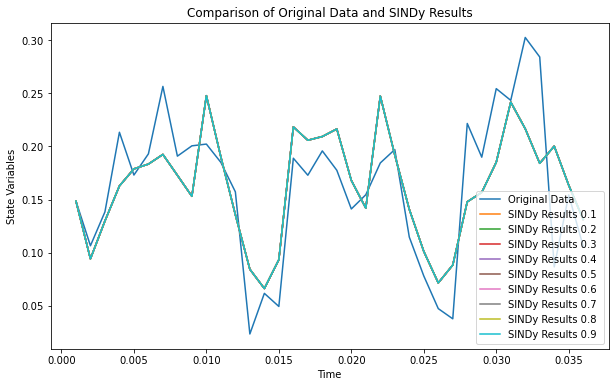

In [268]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:36], X[:,2], label='Original Data')
plt.plot(t[:36], out1[0], label='SINDy Results 0.1')
plt.plot(t[:36], out1[1], label='SINDy Results 0.2')
plt.plot(t[:36], out1[2], label='SINDy Results 0.3 ')
plt.plot(t[:36], out1[3], label='SINDy Results 0.4 ')
plt.plot(t[:36], out1[4], label='SINDy Results 0.5')
plt.plot(t[:36], out1[5], label='SINDy Results 0.6')
plt.plot(t[:36], out1[6], label='SINDy Results 0.7 ')
plt.plot(t[:36], out1[7], label='SINDy Results 0.8 ')
plt.plot(t[:36], out1[8], label='SINDy Results 0.9 ')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()

In [281]:
# RE CHECKING WITH LAMBDA = 0.4 

In [264]:
dt = 0.001
tmax = 50
t = np.arange(dt, tmax + dt, dt)

# Main Parameters
lambda_val = 0.4

# Compute dx/dt
dXdt = np.diff(X, axis=0) / dt
dXdt = np.vstack((dXdt, dXdt[-1]))

# Compute Theta(X)
x, y, z = X[:, 0], X[:, 1], X[:, 2]
x1, y1, z1 = x, y, z
xy, yz, xz = x * y, y * z, x * z
x2, y2, z2 = x**2, y**2, z**2
x3, y3, z3 = x2 * x, y2 * y, z2 * z
x4, y4, z4 = x3 * x, y3 * y, z3 * z
x5, y5, z5 = x4 * x, y4 * y, z4 * z
cosx, cosy, cosz = np.cos(x), np.cos(y), np.cos(z)
sinx, siny, sinz = np.sin(x), np.sin(y), np.sin(z)

# For three-dimensional problems
#Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2, x3, y3, z3,
 #                        x4, y4, z4, cosx, cosy, cosz, sinx, siny, sinz])

Theta = np.column_stack([np.ones_like(x), x1, y1, z1, xy, yz, xz, x2, y2, z2])

# For two-dimensional problems
# Theta = np.column_stack([np.ones_like(x), x1, y1, xy, x2, y2, x3, y3, cosx, cosy, sinx, siny])

# STLS Algorithm
Xi = np.linalg.lstsq(Theta, dXdt, rcond=None)[0]

for k in range(10):
    small_indices = np.abs(Xi) < lambda_val
    Xi[small_indices] = 0

    #dim = 2  # For two-dimensional problems
    dim = 3  # For three-dimensional problems
    #dim=1
    #idx=2
    for idx in range(dim):
        big_indices = ~small_indices[:, idx]
        Xi[big_indices, idx] = np.linalg.lstsq(Theta[:, big_indices], dXdt[:, idx], rcond=None)[0]


In [265]:
malinc=Xi[:,2]

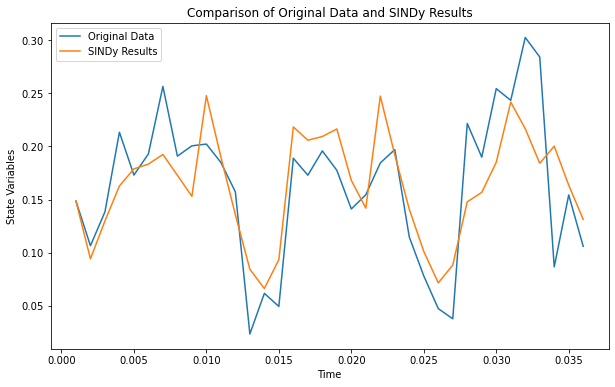

In [266]:
# Plot the original data and the SINDy results
x0, y0, z0 = X[0,:]
X_sindy = np.zeros(36)
#X_sindy[0, :] = [x0, y0, z0]
X_sindy[0] = z0
for idx in range(1, X.shape[0]):
    x, y, z = X[idx - 1, 0], X[idx - 1, 1], X_sindy[idx - 1]
    z = X_sindy[idx - 1]
    #dxdt_sindy = 10 * (y - x)
    #dydt_sindy = x * (28 - z) - y
    dzdt_sindy = mal(x,y,z)  # Try with '2.667' instead of 8/3

    #dXdt_sindy = np.array(dzdt_sindy)

    X_sindy[idx] = X_sindy[idx - 1] + dt * dzdt_sindy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t[:36], X[:,2], label='Original Data')
plt.plot(t[:36], X_sindy, label='SINDy Results')
plt.title('Comparison of Original Data and SINDy Results')
plt.xlabel('Time')
plt.ylabel('State Variables')
plt.legend()
plt.show()